In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from sklearn.preprocessing import StandardScaler

In [2]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df=pd.read_parquet('/content/drive/MyDrive/NK-securities/train_data.parquet')


In [4]:
test_df=pd.read_parquet('/content/drive/MyDrive/NK-securities/test_data.parquet')

In [5]:

sample_submission_df=pd.read_csv('/content/drive/MyDrive/NK-securities/sample_submission.csv')

In [6]:

# 1. Data Preparation & Feature Normalization




# Identify columns
feature_cols = [f'X{i}' for i in range(42) if f'X{i}' in test_df.columns] + ['underlying']
iv_cols = [col for col in test_df.columns if 'iv_' in col]

# Normalize features
scaler = StandardScaler()
test_df[feature_cols] = scaler.fit_transform(test_df[feature_cols])



In [7]:

# Identify columns
feature_cols_train = [f'X{i}' for i in range(42) if f'X{i}' in train_df.columns] + ['underlying']
iv_cols_train = [col for col in train_df.columns if 'iv_' in col]

In [8]:
train_df.head()

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


In [9]:
train_df.describe()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
count,1.783400e+05,178340.000000,178340.000000,1.783400e+05,178340.000000,1.783400e+05,1.783400e+05,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,1.783400e+05,178340.000000,178340.000000,178340.000000,1.783400e+05,1.783400e+05,1.783400e+05,1.783400e+05
mean,1.746052e+18,24323.883938,0.423909,-3.220020e+07,0.349236,3.499773e+05,1.429192e+03,1.580317,0.195213,0.160997,...,0.000277,0.000014,-1.421471e+04,0.000588,-0.093444,0.000832,-1.877999e+04,-1.383081e+05,-4.700416e+03,-3.956062e+02
std,3.824884e+14,129.485600,2.178706,6.800128e+09,1.984786,7.389699e+07,5.550653e+05,402.799771,0.056097,0.032196,...,0.016701,0.008653,2.262233e+06,0.039787,2.346862,0.085648,4.314987e+06,1.873729e+07,7.563046e+05,1.225248e+06
min,1.745296e+18,23865.200000,0.186658,-1.435870e+12,0.036630,-1.244180e+05,-9.622650e+04,-0.045733,0.123994,0.074081,...,-0.275930,-0.144559,-1.019237e+08,-0.625017,-16.815711,-2.586113,-2.726196e+08,-4.113054e+08,-8.211573e+07,-3.067265e+08
25%,1.745818e+18,24280.600000,0.256790,2.417285e-01,0.226604,2.107440e-01,1.925507e-01,0.173014,0.161050,0.143029,...,-0.007785,-0.004317,-6.453953e+05,-0.018780,-1.098059,-0.022254,-7.875973e+05,-5.170499e+06,-1.279849e+05,-0.000000e+00
50%,1.745995e+18,24347.000000,0.297625,2.770240e-01,0.256366,2.354450e-01,2.165680e-01,0.196701,0.174057,0.157880,...,0.000258,0.000012,0.000000e+00,0.000566,-0.006216,0.000048,4.336592e+03,-2.000000e-06,0.000000e+00,0.000000e+00
75%,1.746432e+18,24385.200000,0.404716,3.753433e-01,0.346050,3.155980e-01,2.813773e-01,0.246242,0.210348,0.168074,...,0.008461,0.004381,6.062090e+05,0.020147,0.965078,0.023691,8.029313e+05,5.008932e+06,1.150824e+05,0.000000e+00
max,1.746610e+18,24668.500000,912.411000,7.904570e+08,833.879000,1.560360e+10,2.334040e+08,120282.000000,0.633309,0.445672,...,0.402689,0.191822,4.357080e+07,0.841955,22.124694,2.564958,2.498199e+08,6.597803e+08,2.846932e+07,1.981789e+08


In [10]:
train_df.columns

Index(['timestamp', 'underlying', 'expiry', 'call_iv_23500', 'call_iv_23600',
       'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000',
       'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400',
       'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800',
       'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200',
       'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600',
       'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000',
       'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800',
       'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200',
       'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600',
       'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000',
       'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400',
       'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800',
       'put_iv_24900', 'put_iv_25000', 'X0', '

In [11]:
test_df.columns

Index(['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100',
       'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500',
       'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900',
       'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300',
       'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700',
       'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100',
       'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500',
       'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300',
       'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700',
       'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100',
       'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500',
       'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900',
       'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300',
       'put_iv_25400', 'put_iv_25500', 'X0', 'X1', 'X2',

In [12]:
sample_submission_df.columns

Index(['timestamp', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200',
       'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600',
       'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000',
       'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400',
       'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800',
       'call_iv_25900', 'call_iv_26000', 'call_iv_26100', 'call_iv_26200',
       'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_23000',
       'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400',
       'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800',
       'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200',
       'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600',
       'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000',
       'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400',
       'put_iv_25500'],
      dtype='object')

In [19]:
test_df

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,-1.661569,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,...,0.663962,0.092911,-0.024374,-0.063603,-0.392946,0.046047,0.398702,-0.004258,0.006258,-0.559490
1,1,-1.332567,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,...,0.580920,0.161123,-0.041717,-0.235256,-0.066972,-0.053319,-0.755161,-0.370345,-0.672751,0.492133
2,2,0.058213,NaN,0.251731,NaN,NaN,0.214869,0.204580,0.194604,NaN,...,0.073646,-1.369281,0.118565,0.381197,0.849529,1.793902,0.509732,-0.004258,-0.023866,-0.275940
3,3,0.071031,0.241888,NaN,0.220505,NaN,0.198602,0.186190,NaN,NaN,...,-0.967149,-0.905692,-0.565335,0.031009,0.265579,-0.064622,-1.308013,-0.434649,-1.670228,-1.951433
4,4,0.160759,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,...,-1.925825,-0.310247,-0.051909,-1.557104,0.109752,-0.534139,0.275949,0.053375,1.608930,0.323592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,1.075128,NaN,0.233427,NaN,NaN,NaN,NaN,NaN,0.186856,...,-1.113447,0.251054,-0.021513,-0.655743,-0.310727,-1.606916,-1.334378,0.044356,-1.531660,-0.704304
12061,12061,1.376357,NaN,0.236380,0.226972,NaN,NaN,0.200906,0.193655,NaN,...,-0.034309,0.930739,-0.143664,-0.143778,-0.803349,0.250666,-0.379426,-0.270236,-1.495745,0.005801
12062,12062,0.061418,0.256475,0.243817,0.234267,0.221270,NaN,NaN,NaN,0.185088,...,-0.934958,0.217993,0.224806,-0.145864,-0.278762,-2.200758,0.443591,-0.004258,1.417929,-0.376145
12063,12063,1.539790,NaN,0.239825,NaN,NaN,NaN,NaN,NaN,0.190833,...,0.155252,2.438728,0.071953,0.965181,1.761538,0.010256,1.575231,0.048929,1.225759,-0.118858


In [20]:
test_df.describe()

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
count,12065.000000,1.206500e+04,4762.000000,4786.000000,4838.000000,4882.000000,4855.000000,4852.000000,4787.000000,4850.000000,...,1.206500e+04,1.206500e+04,1.206500e+04,1.206500e+04,1.206500e+04,1.206500e+04,1.206500e+04,12065.000000,1.206500e+04,1.206500e+04
mean,6032.000000,6.344237e-15,0.256363,0.246952,0.236247,0.226294,0.216683,0.208504,0.201364,0.194952,...,-8.245005e-18,1.354537e-17,5.889289e-19,1.177858e-18,-1.118965e-17,-1.325090e-17,1.295644e-17,0.000000,1.649001e-17,5.300360e-18
std,3483.009833,1.000041e+00,0.023853,0.021822,0.021306,0.021189,0.021575,0.022383,0.022996,0.023187,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00
min,0.000000,-2.285391e+00,0.211965,0.202257,0.192681,0.184373,0.174893,0.167585,0.159284,0.154661,...,-4.940255e+00,-8.096331e+00,-1.652802e+01,-6.704855e+00,-9.500877e+00,-9.193356e+00,-1.308200e+01,-19.212582,-5.441390e+00,-3.214840e+01
25%,3016.000000,-9.544289e-01,0.239741,0.232181,0.222599,0.213123,0.203543,0.195321,0.187535,0.180466,...,-6.847035e-01,-5.261105e-01,-2.326609e-01,-4.917386e-01,-4.337459e-01,-5.652199e-01,-4.886901e-01,-0.178046,-5.986115e-01,-1.906582e-01
50%,6032.000000,6.675868e-02,0.246227,0.240036,0.229500,0.219496,0.210058,0.201290,0.193798,0.187498,...,9.467288e-03,5.030578e-04,-3.698752e-03,1.690224e-02,2.862426e-02,8.374662e-04,-1.069972e-04,-0.004258,2.741000e-02,4.176456e-03
75%,9048.000000,9.960821e-01,0.276737,0.264015,0.254009,0.246418,0.238230,0.231477,0.226482,0.220966,...,6.769826e-01,5.419437e-01,2.135331e-01,5.077709e-01,4.547364e-01,5.553571e-01,4.953081e-01,0.162632,6.359655e-01,2.087285e-01
max,12064.000000,1.795087e+00,0.329322,0.325091,0.294849,0.280493,0.267558,0.257639,0.250346,0.245681,...,4.600365e+00,7.319476e+00,2.254030e+01,8.850582e+00,1.113769e+01,7.675106e+00,1.116151e+01,25.209205,4.405160e+00,1.979337e+01


In [13]:
#replacing all negative values in iv_cols of train_df to zero

for col in iv_cols_train:
  train_df[col] = train_df[col].apply(lambda x: max(0, x))

In [14]:
# printing no of values less than zero in train_df

zero_values_count = (train_df[iv_cols_train] < 0).sum().sum()
print(f"Number of values less than zero in iv_cols_train of train_df: {zero_values_count}")

Number of values less than zero in iv_cols_train of train_df: 0


In [15]:
call_cols = [col for col in test_df.columns if 'call_iv_' in col]
put_cols = [col for col in test_df.columns if 'put_iv_' in col]


In [16]:
call_strikes = [int(col.split('_')[-1]) for col in call_cols]
put_strikes = [int(col.split('_')[-1]) for col in put_cols]


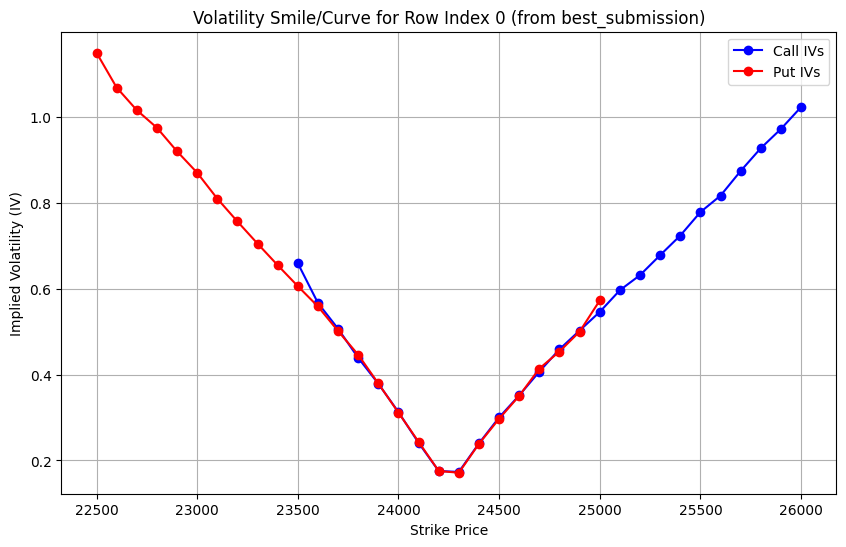

In [17]:
#volatality smile/curve

import matplotlib.pyplot as plt
#Get the call and put
call_iv_cols_submission = [col for col in train_df.columns if 'call_iv_' in col]
put_iv_cols_submission = [col for col in train_df.columns if 'put_iv_' in col]

#Extract strikes for plotting
call_strikes_submission = [int(col.split('_')[-1]) for col in call_iv_cols_submission]
put_strikes_submission = [int(col.split('_')[-1]) for col in put_iv_cols_submission]

#Sort strikes and columns to ensure correct plotting order
call_strikes_submission, call_iv_cols_submission = zip(*sorted(zip(call_strikes_submission, call_iv_cols_submission)))
put_strikes_submission, put_iv_cols_submission = zip(*sorted(zip(put_strikes_submission, put_iv_cols_submission)))


#Function to plot the volatility smile for a row
def plot_volatility_smile(row, call_cols, call_strikes, put_cols, put_strikes, row_index):
    plt.figure(figsize=(10, 6))

    # Plot Call IVs
    call_iv_values = row[list(call_cols)].values
    plt.plot(call_strikes, call_iv_values, marker='o', linestyle='-', color='blue', label='Call IVs')

    # Plot Put IVs
    put_iv_values = row[list(put_cols)].values
    plt.plot(put_strikes, put_iv_values, marker='o', linestyle='-', color='red', label='Put IVs')

    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility (IV)')
    plt.title(f'Volatility Smile/Curve for Row Index {row_index} (from best_submission)')
    plt.legend()
    plt.grid(True)
    plt.show()

#Plot the volatility smile for thea row of train df
plot_volatility_smile(train_df.iloc[1000], call_iv_cols_submission, call_strikes_submission, put_iv_cols_submission, put_strikes_submission, train_df.index[0])




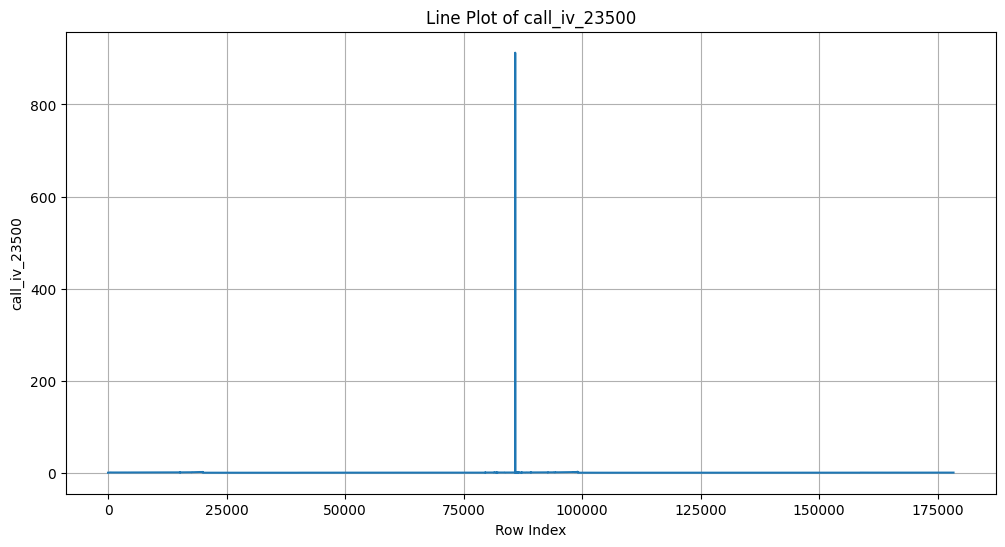

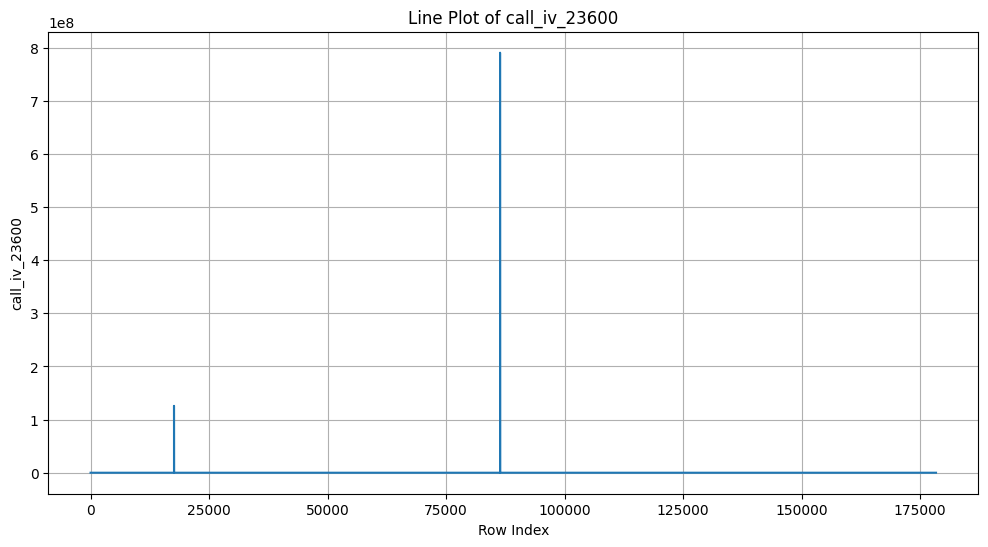

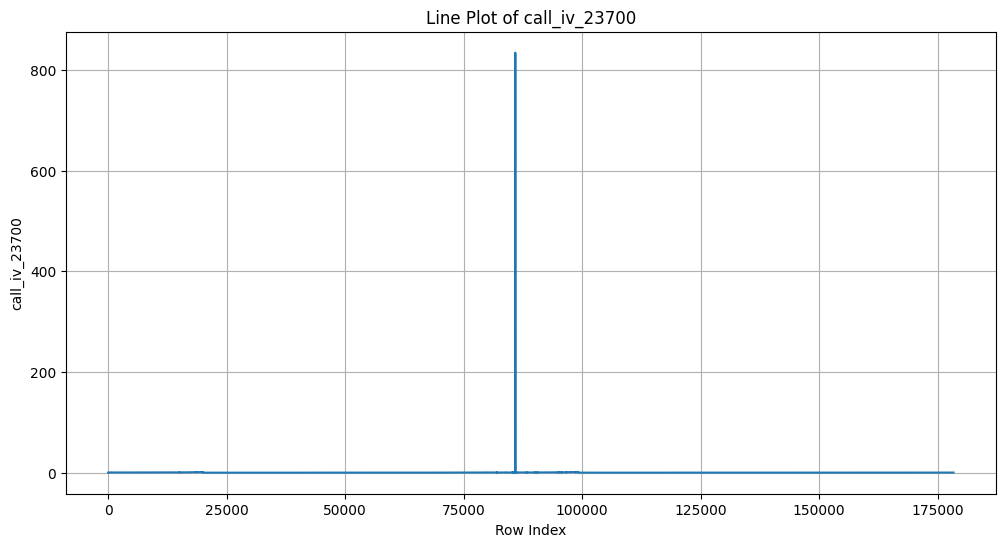

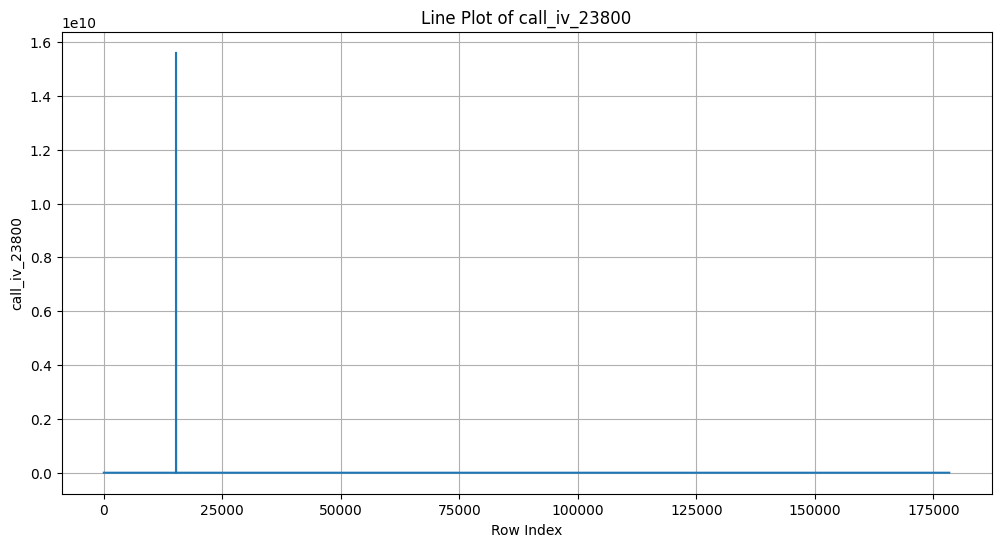

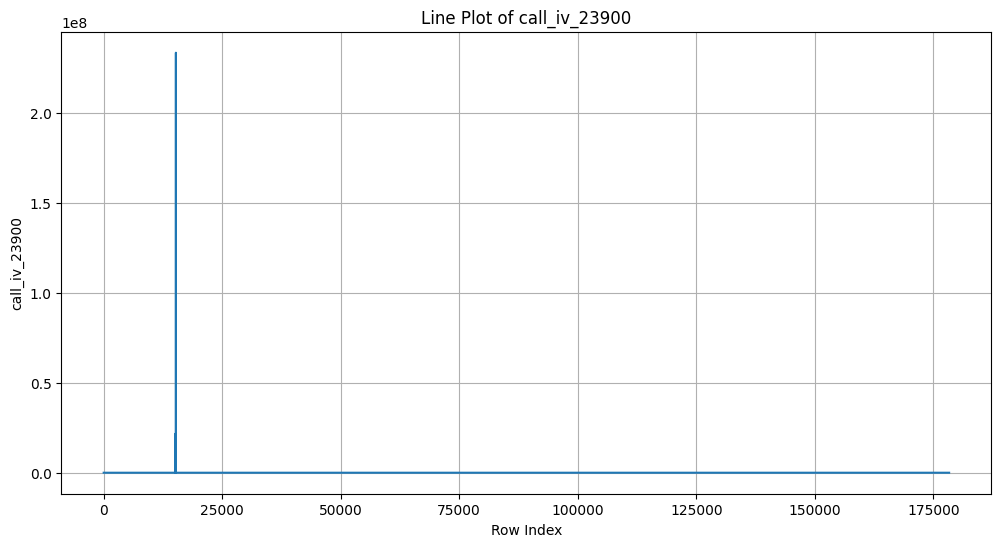

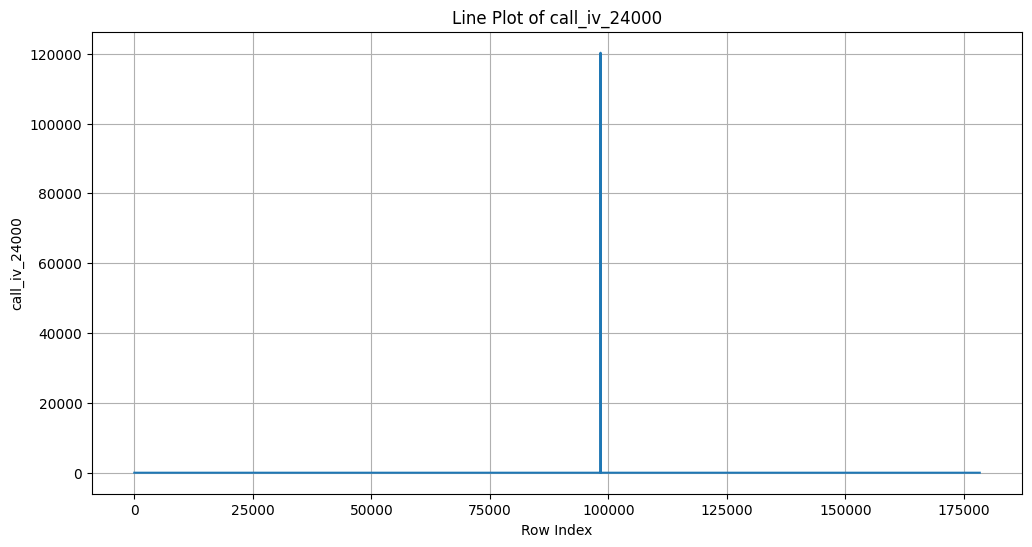

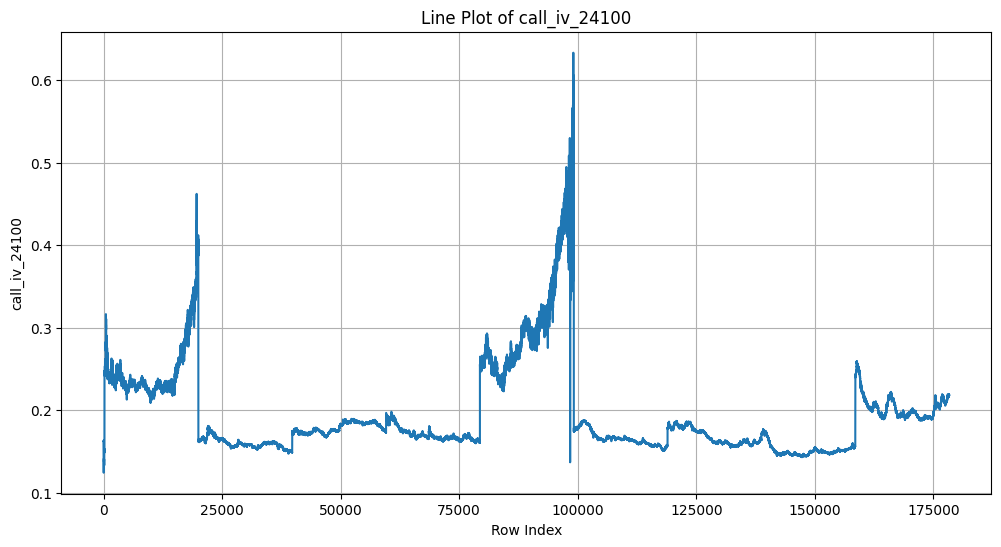

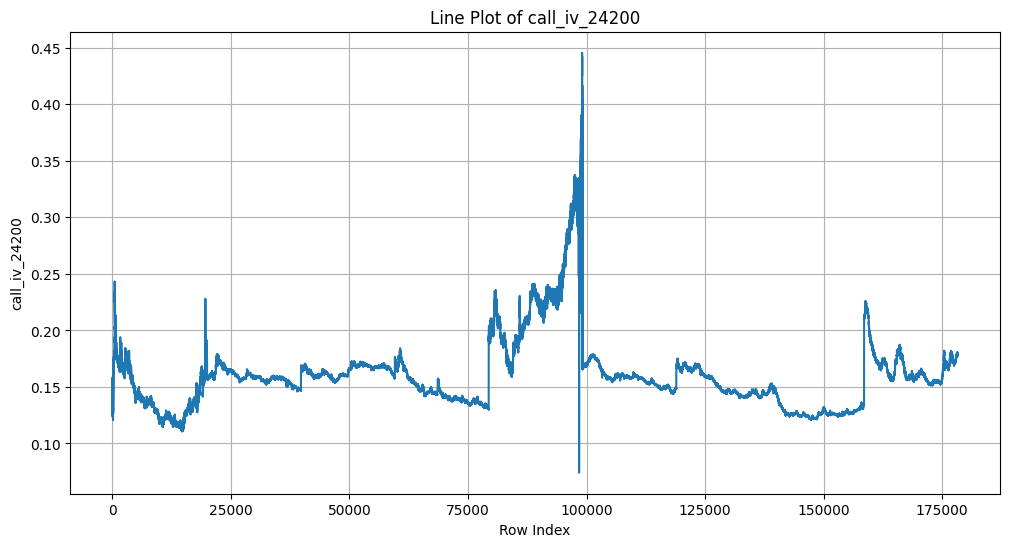

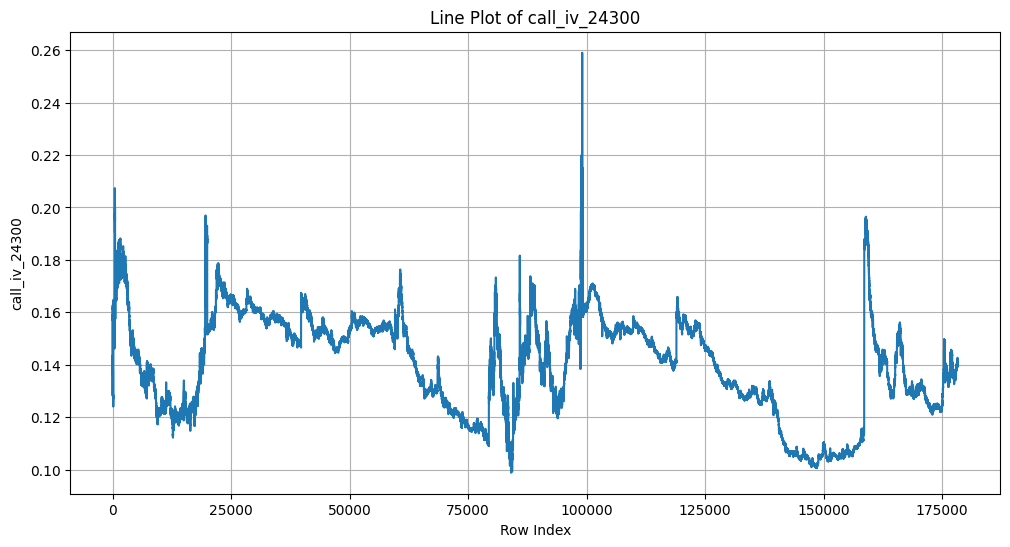

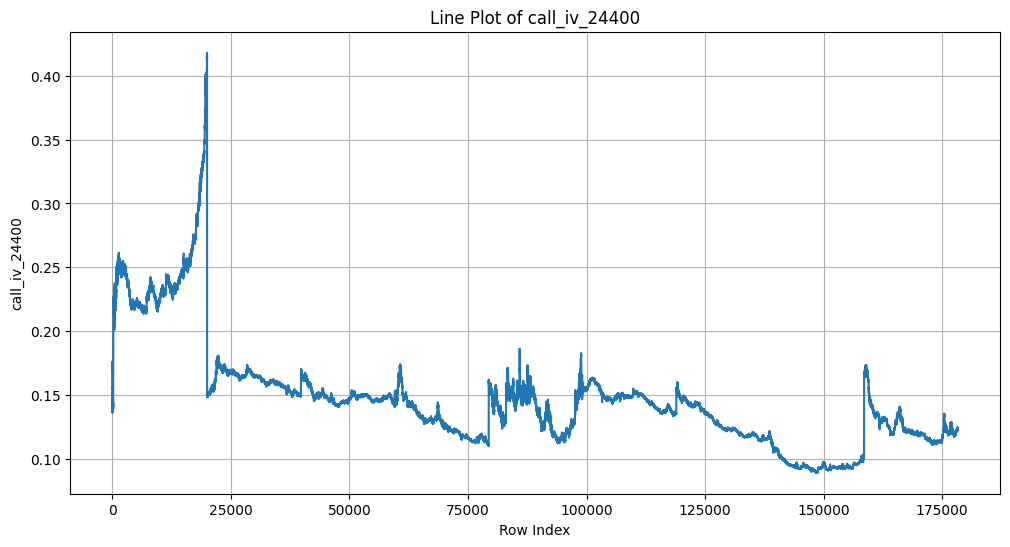

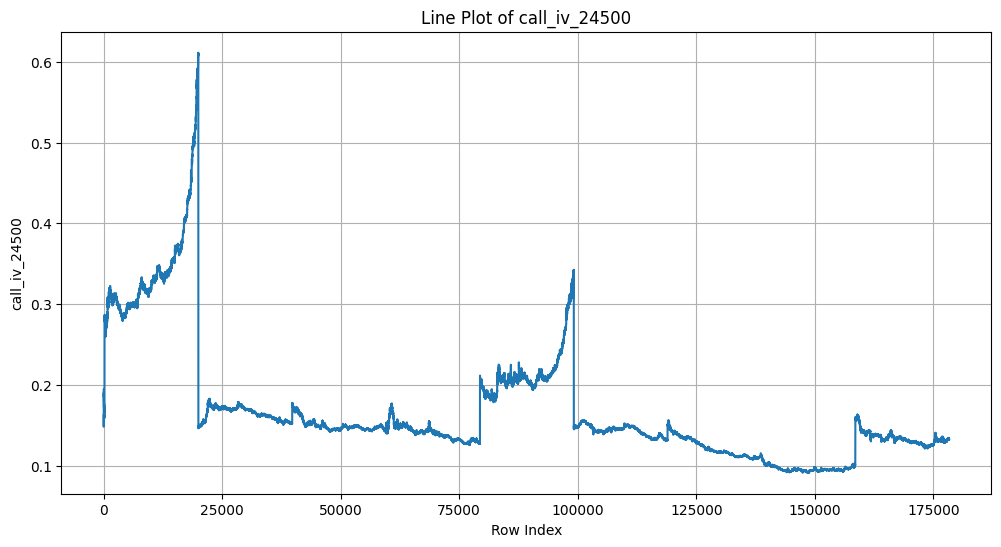

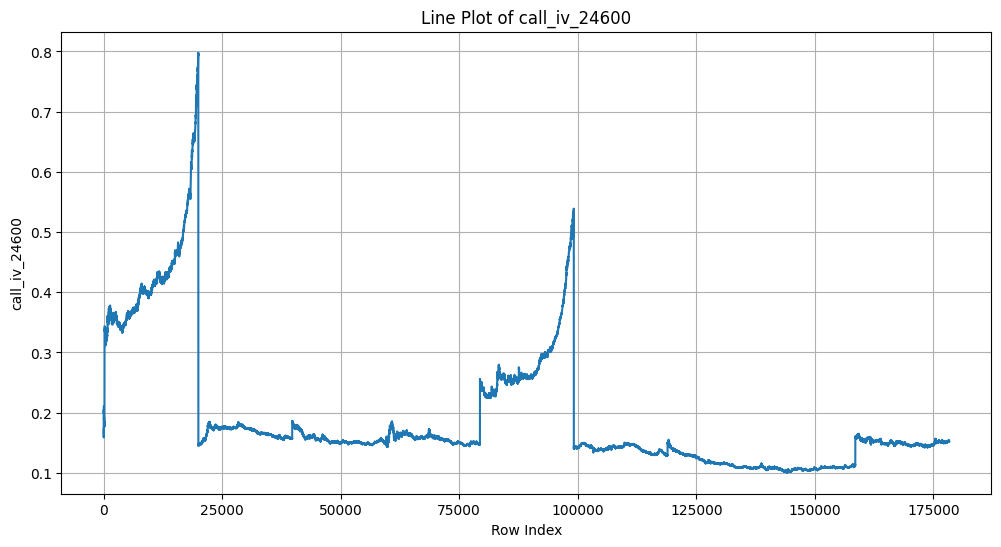

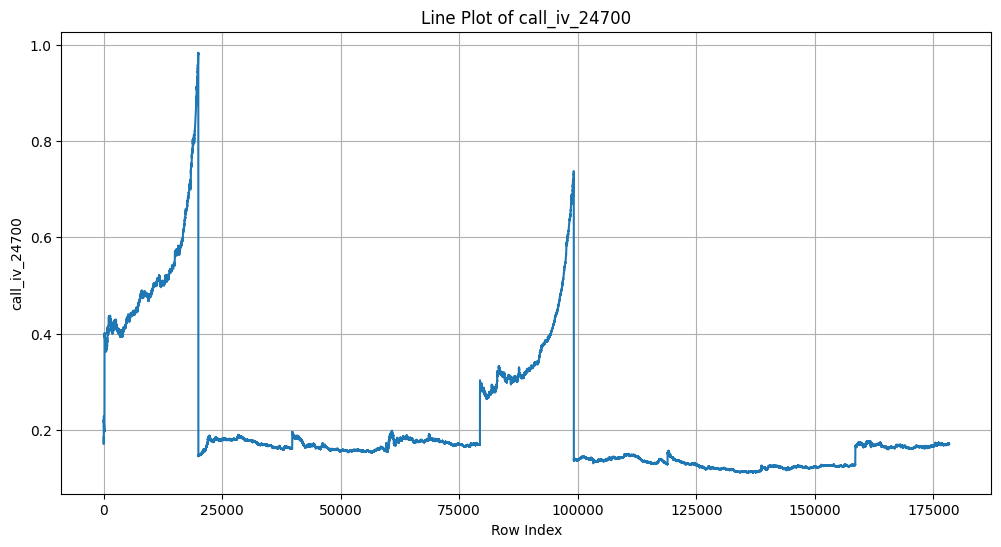

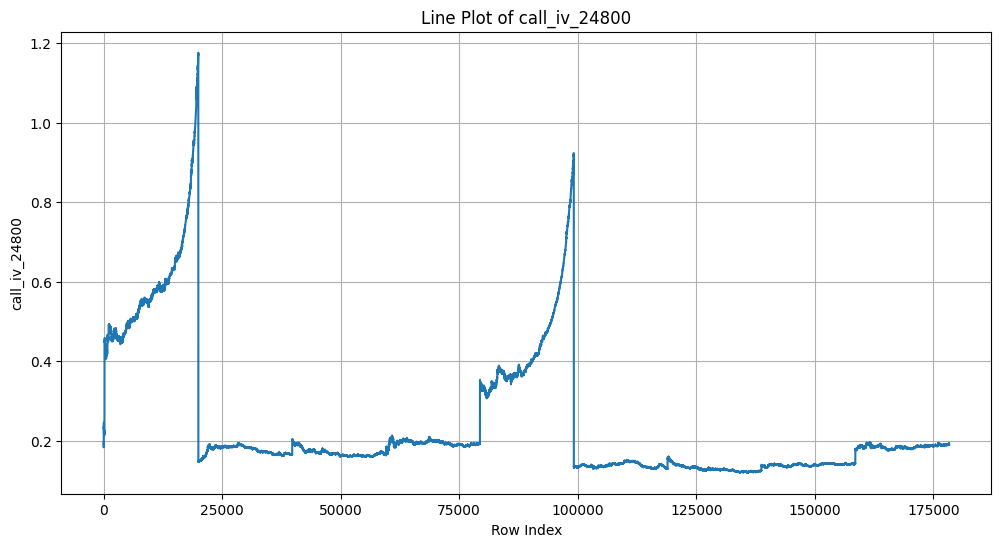

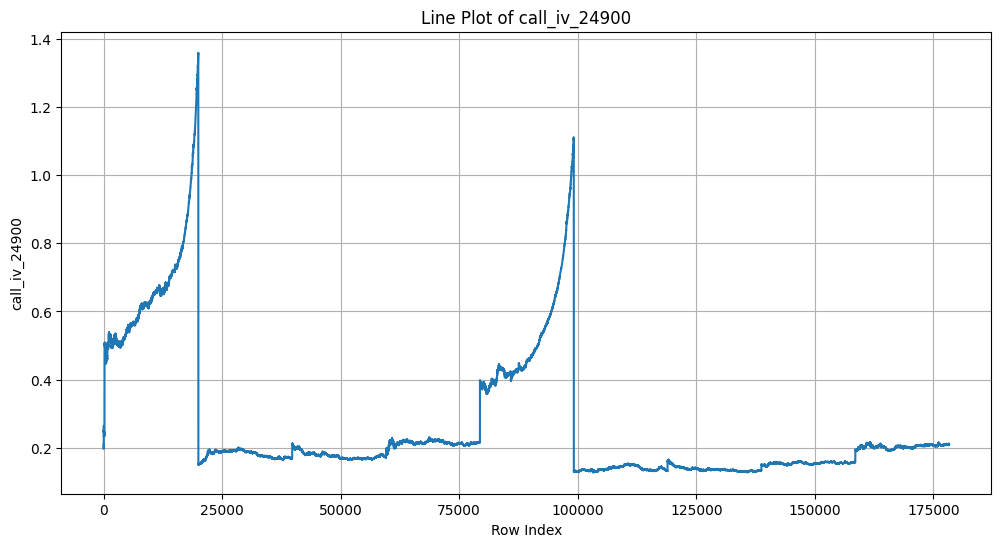

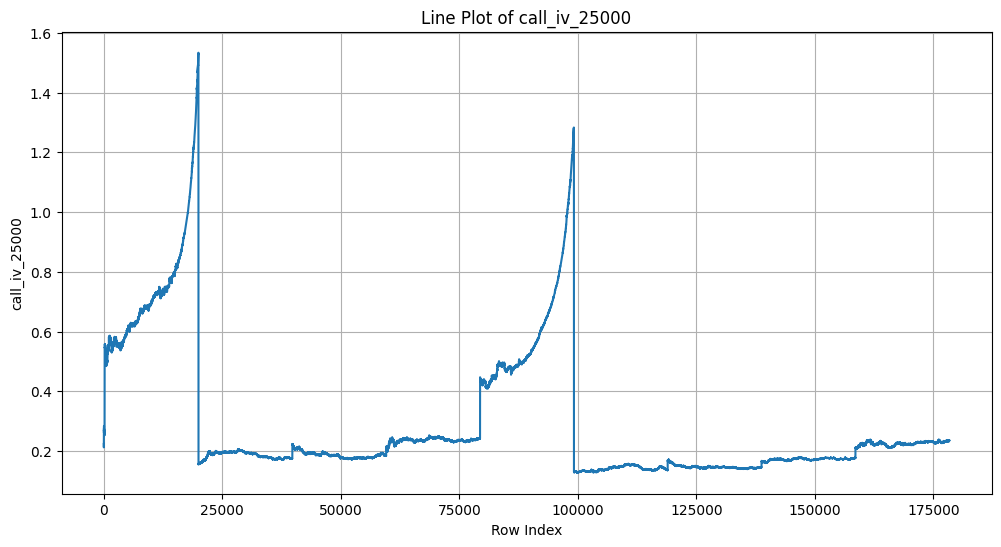

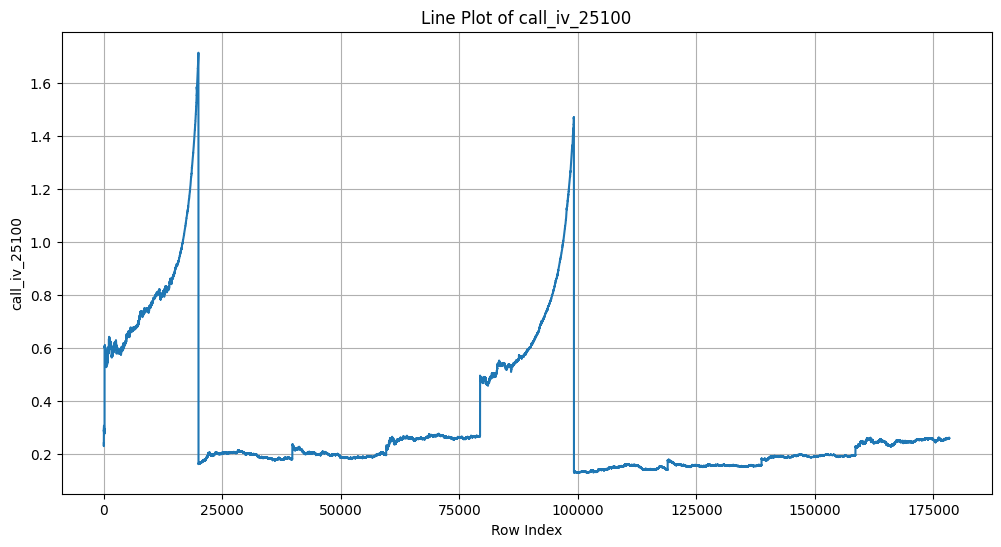

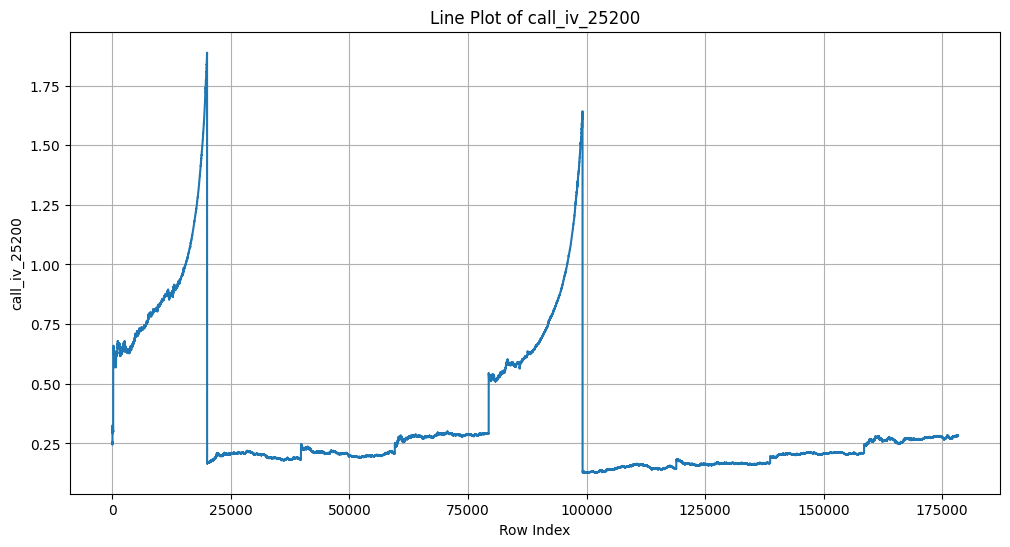

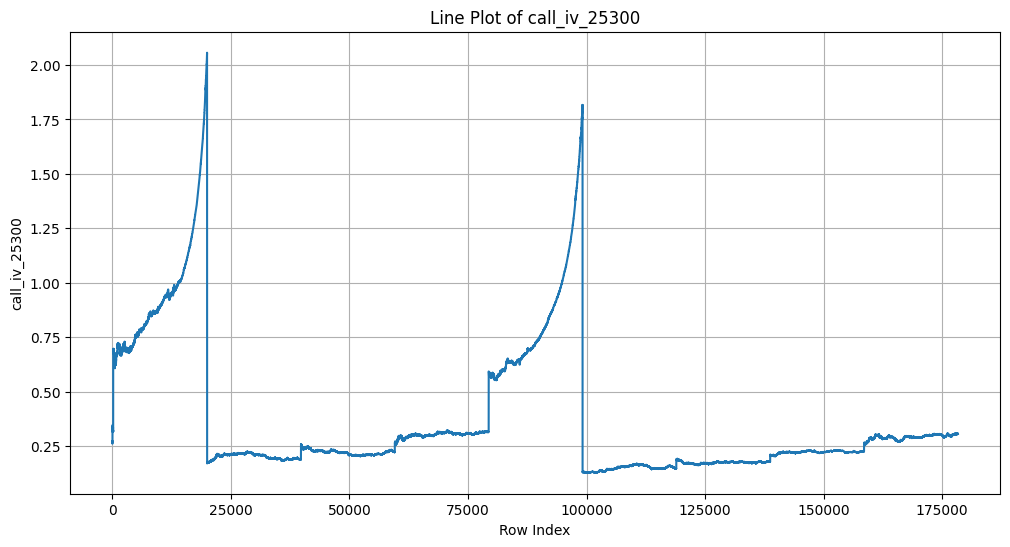

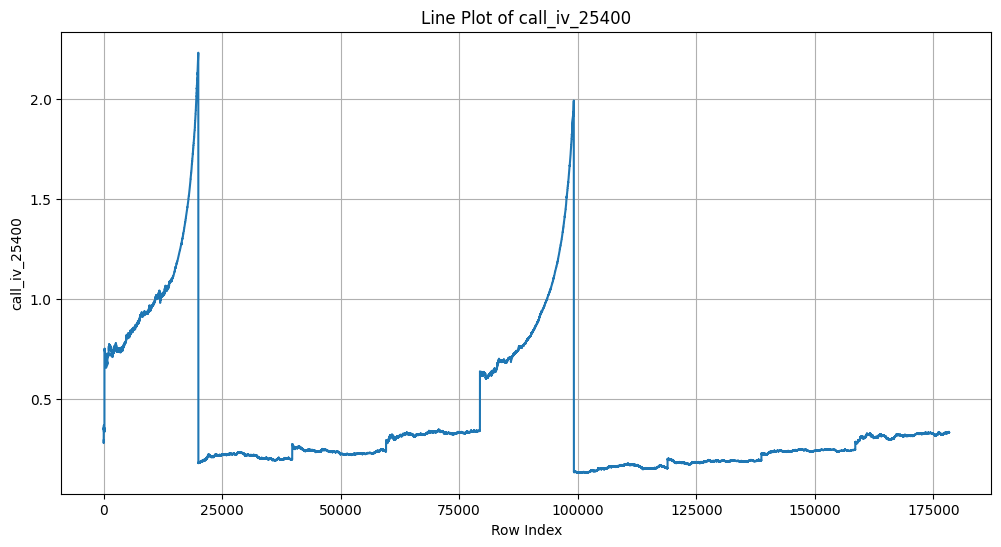

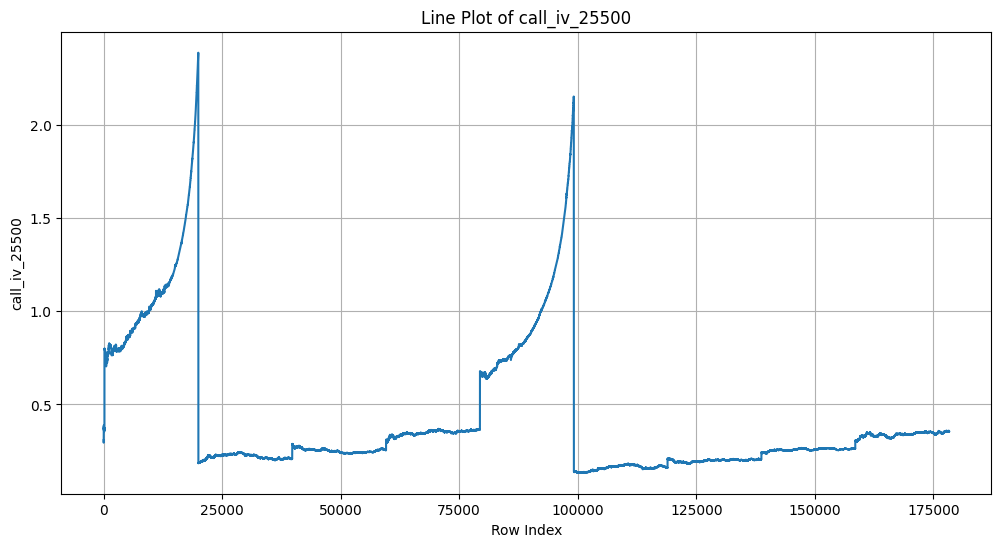

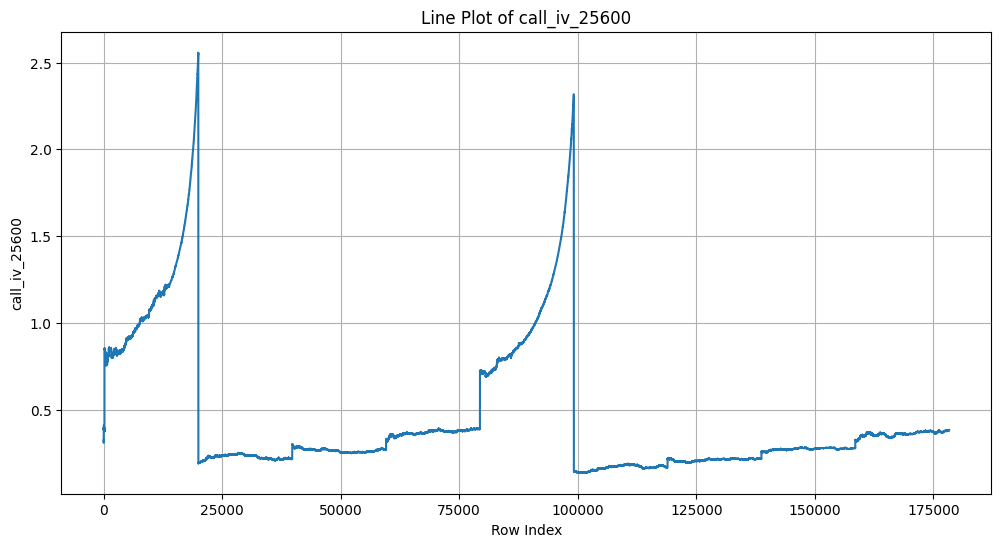

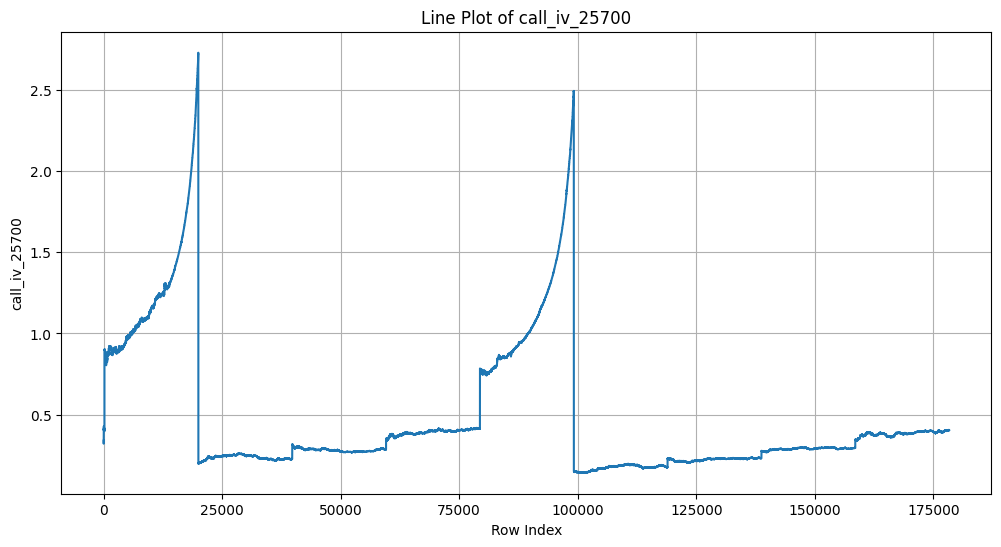

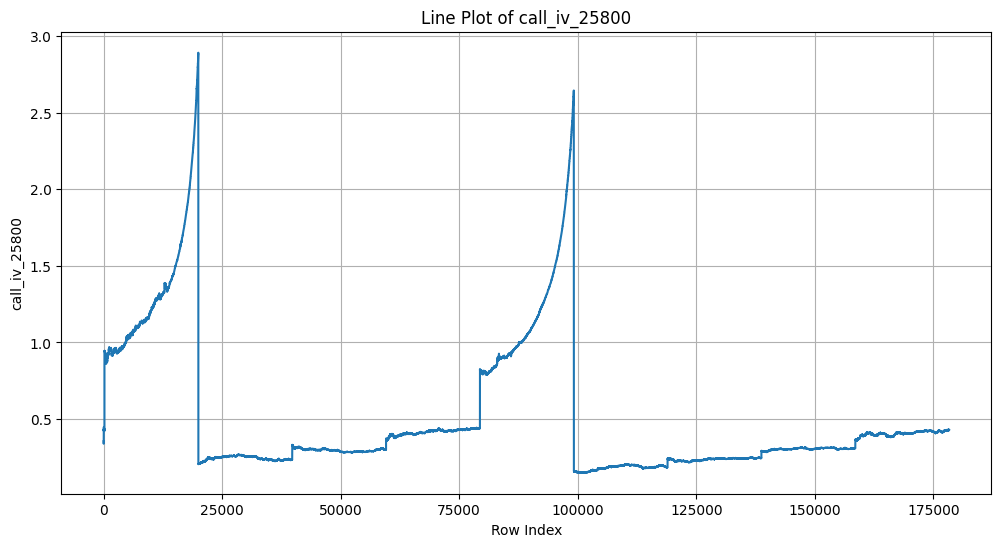

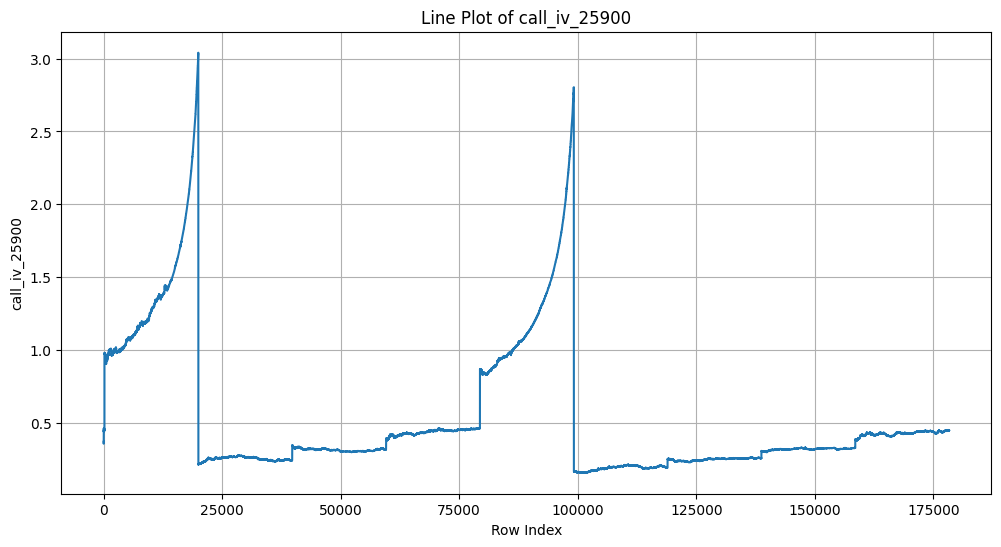

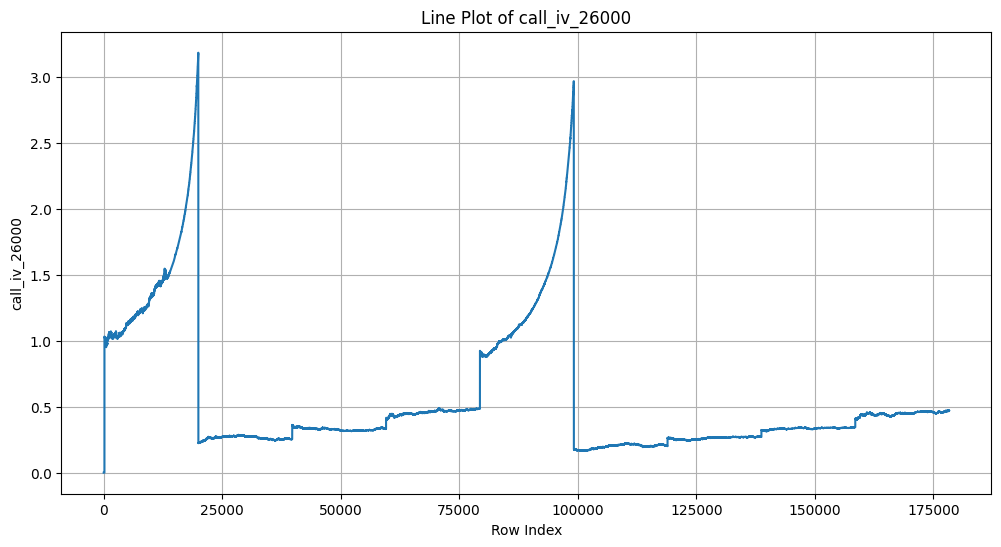

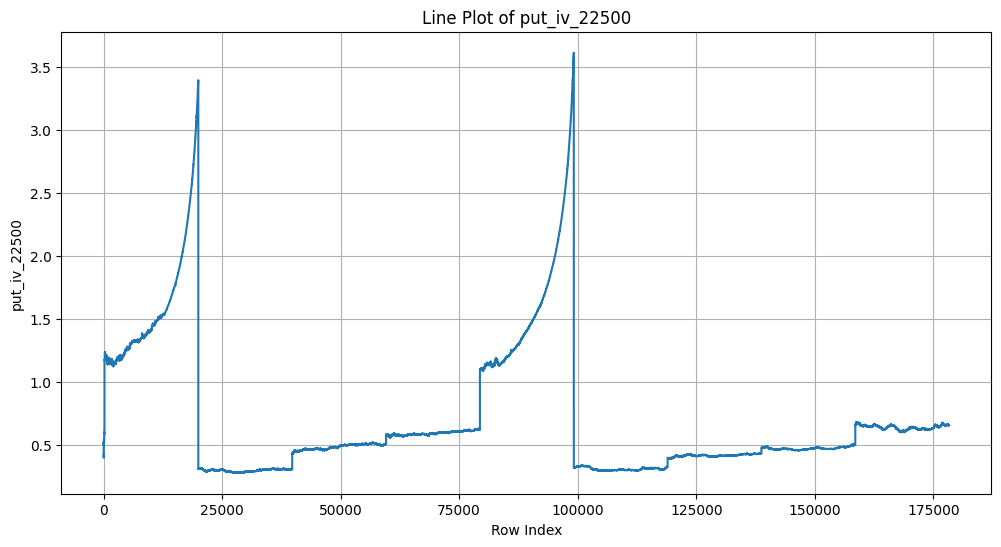

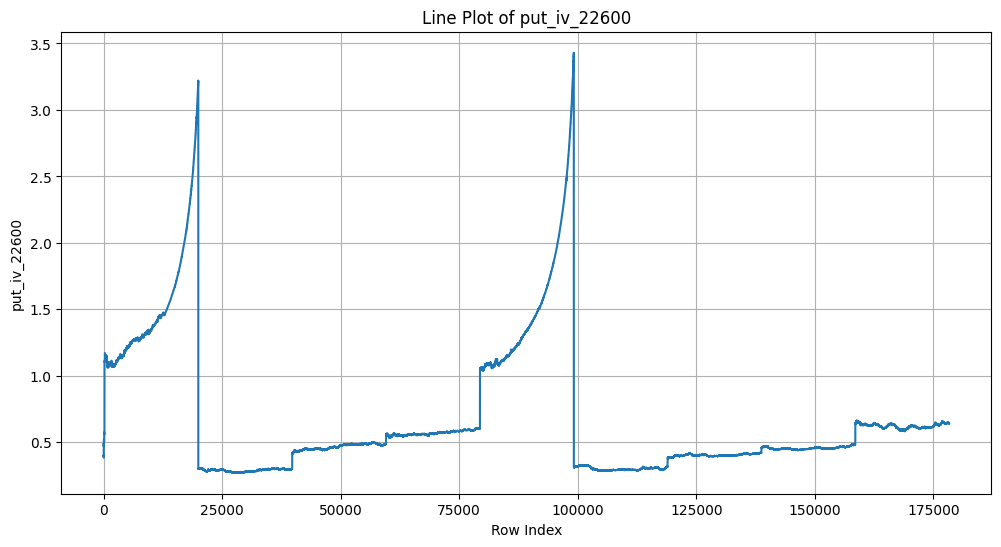

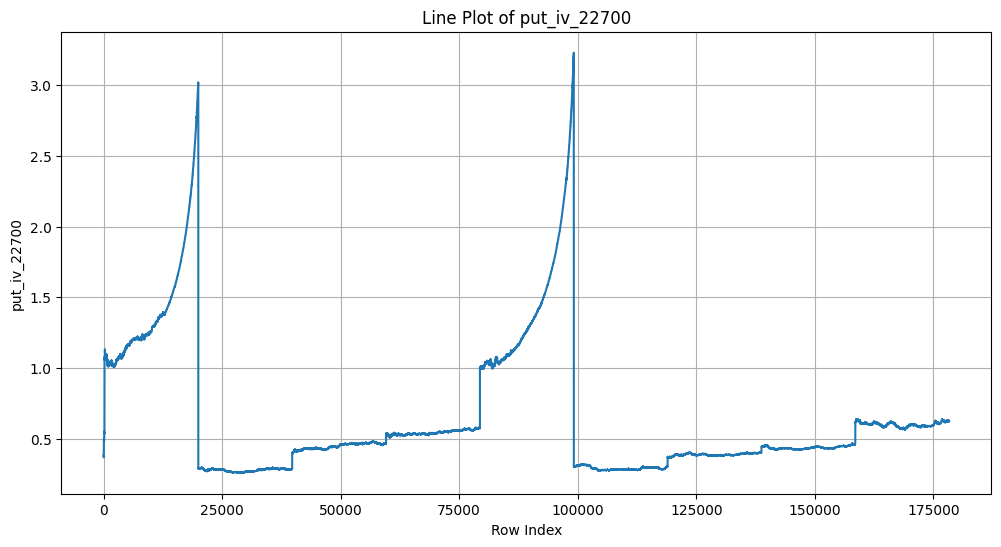

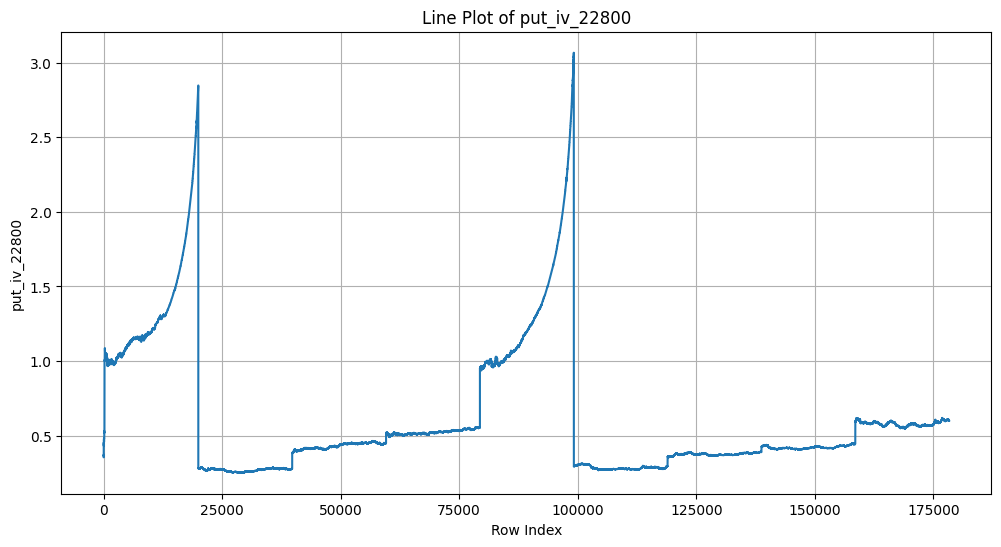

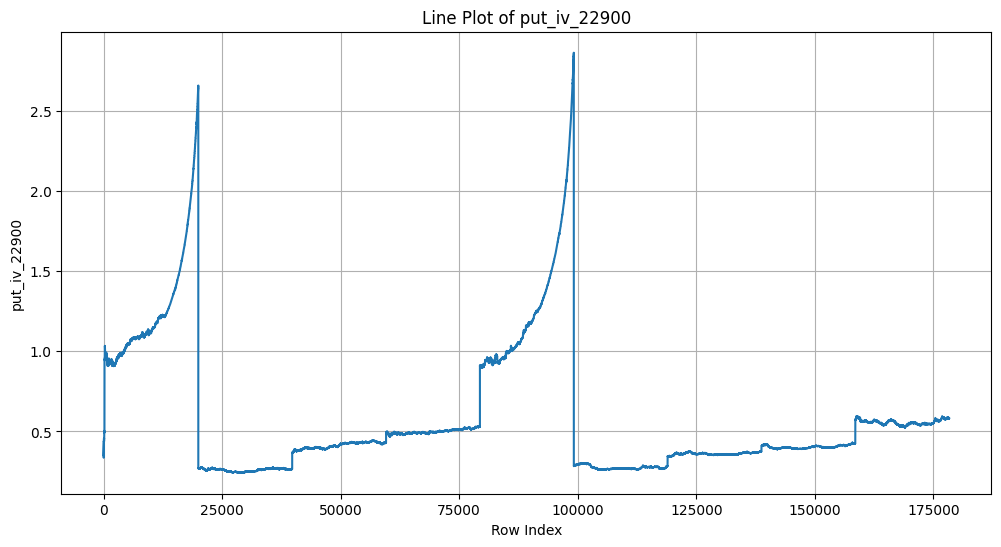

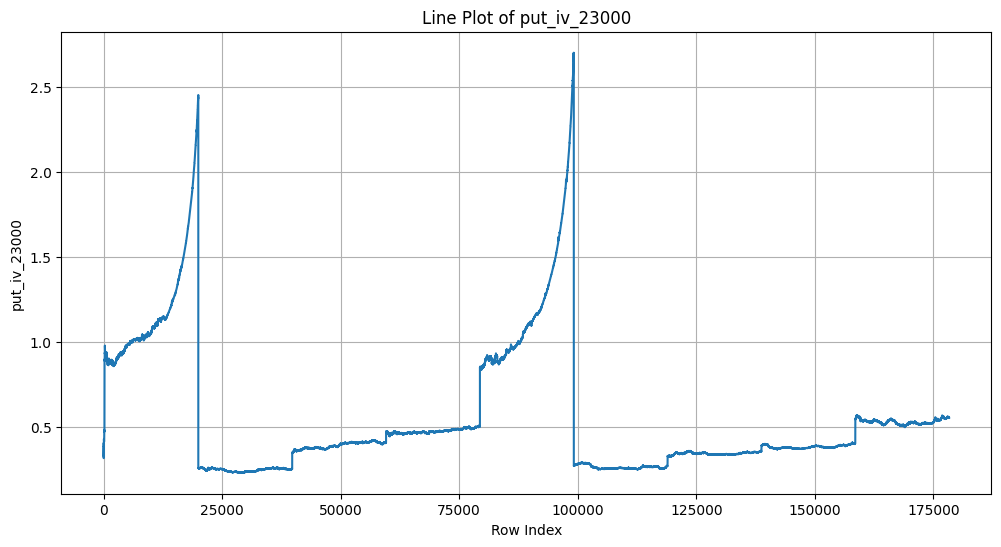

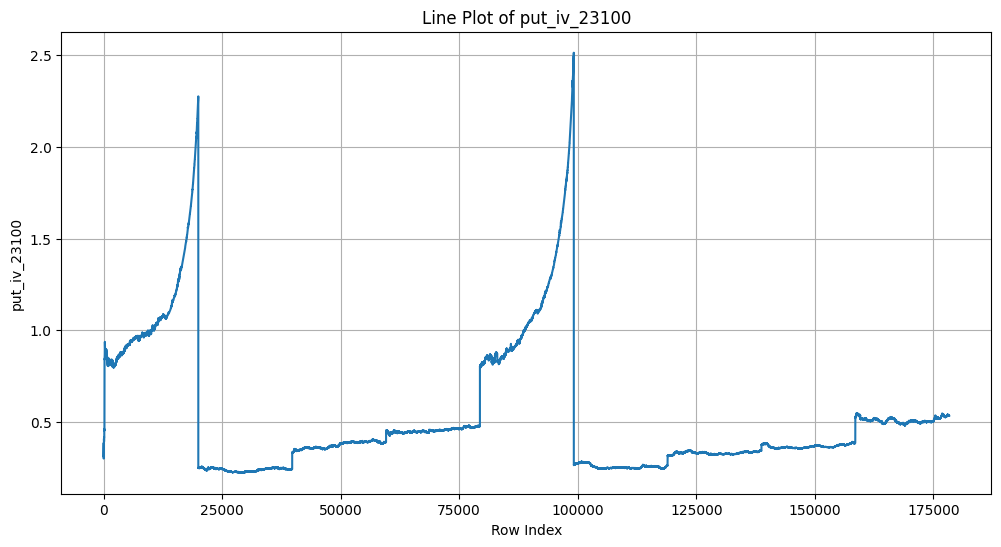

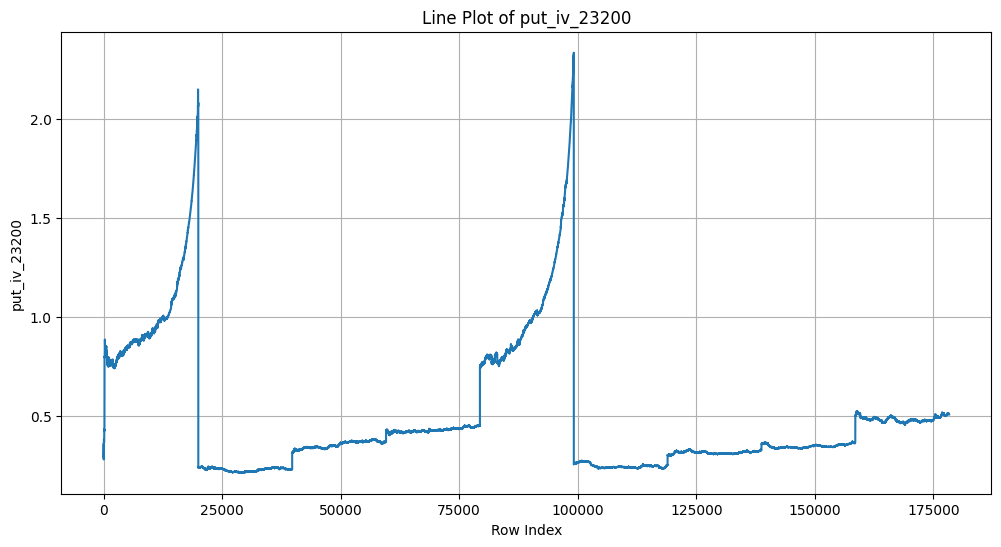

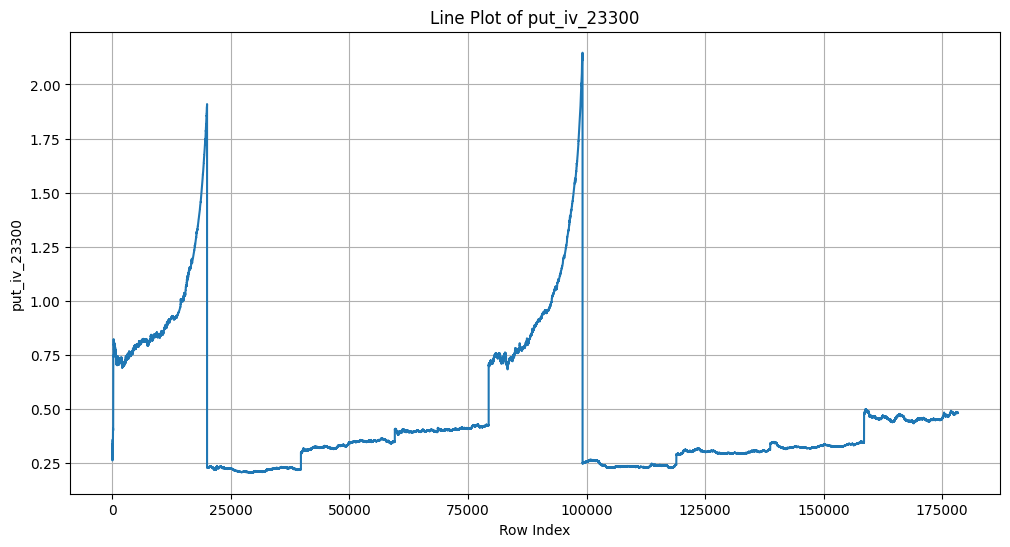

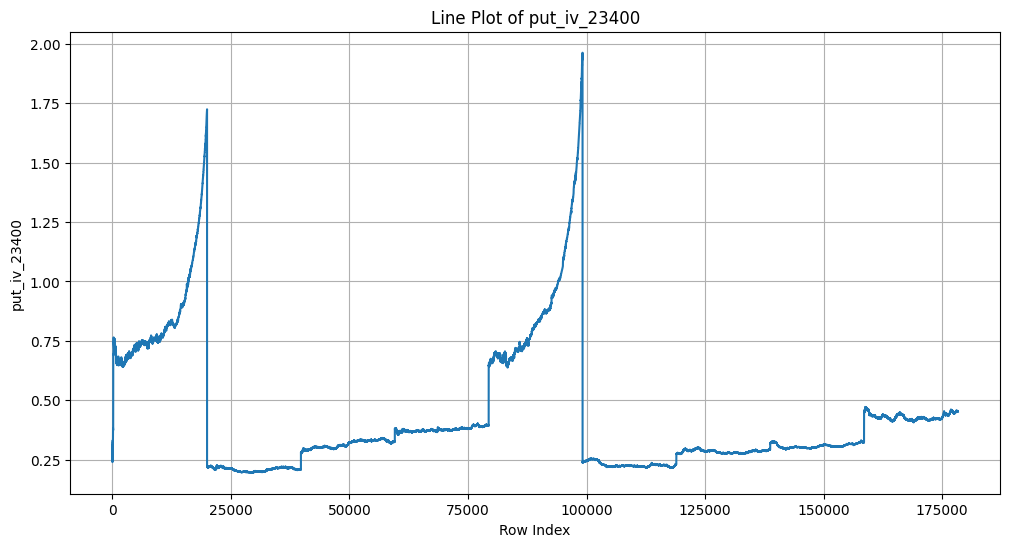

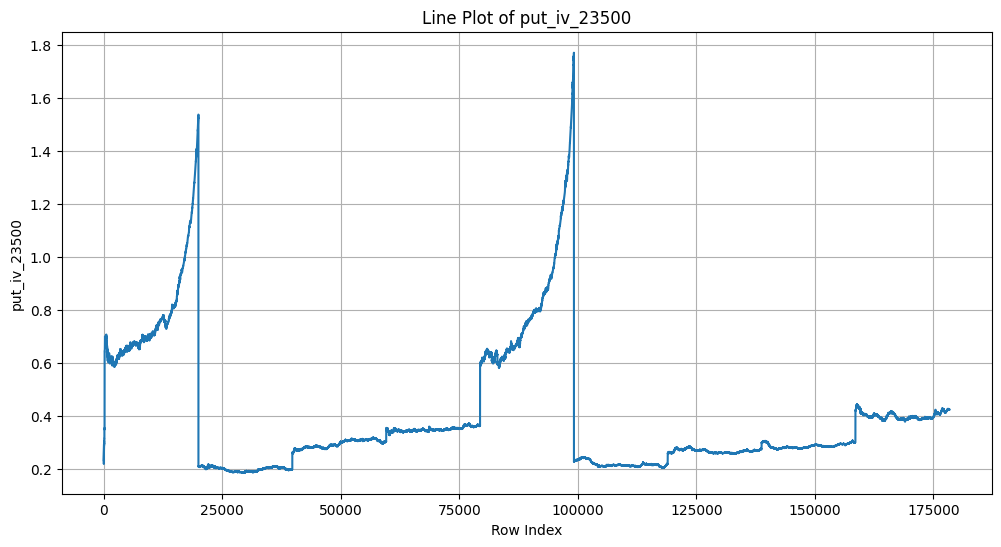

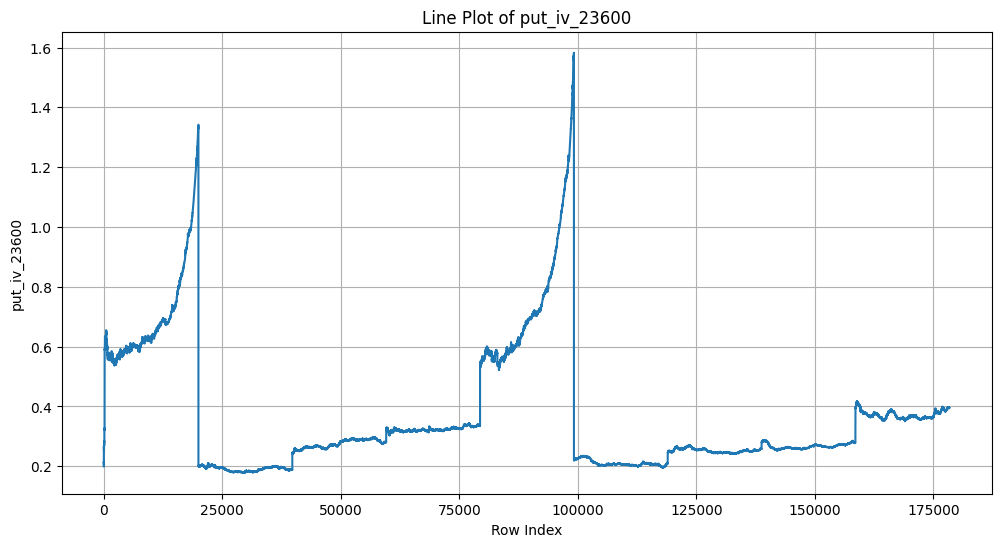

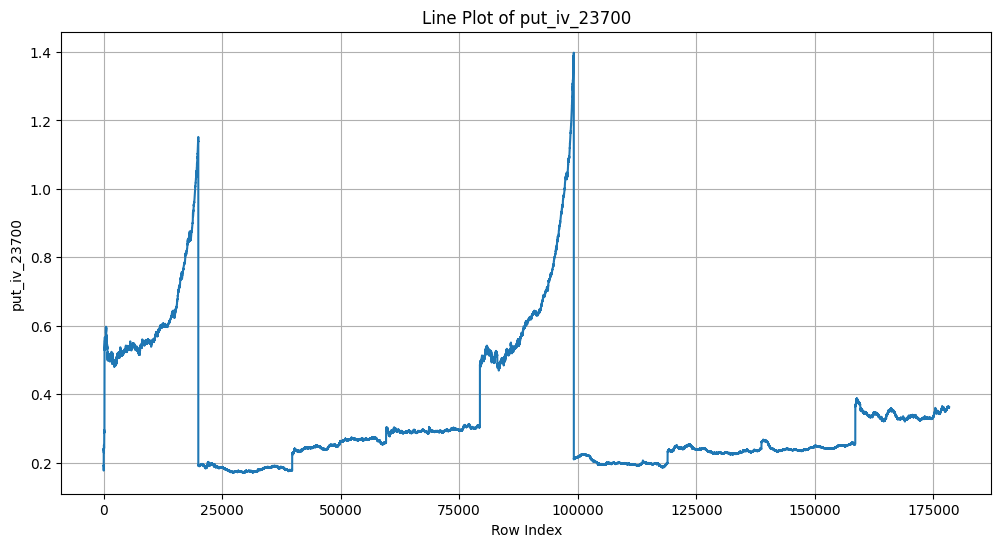

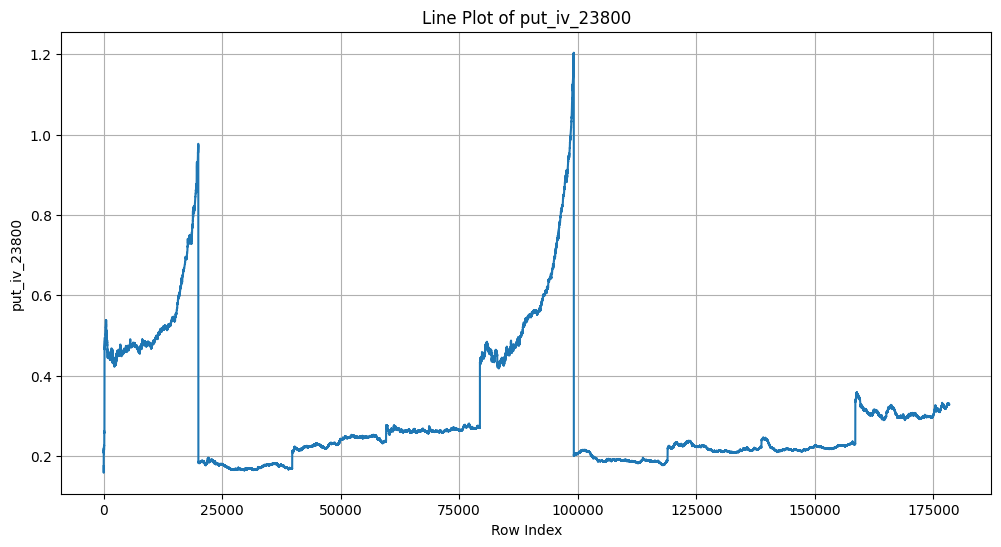

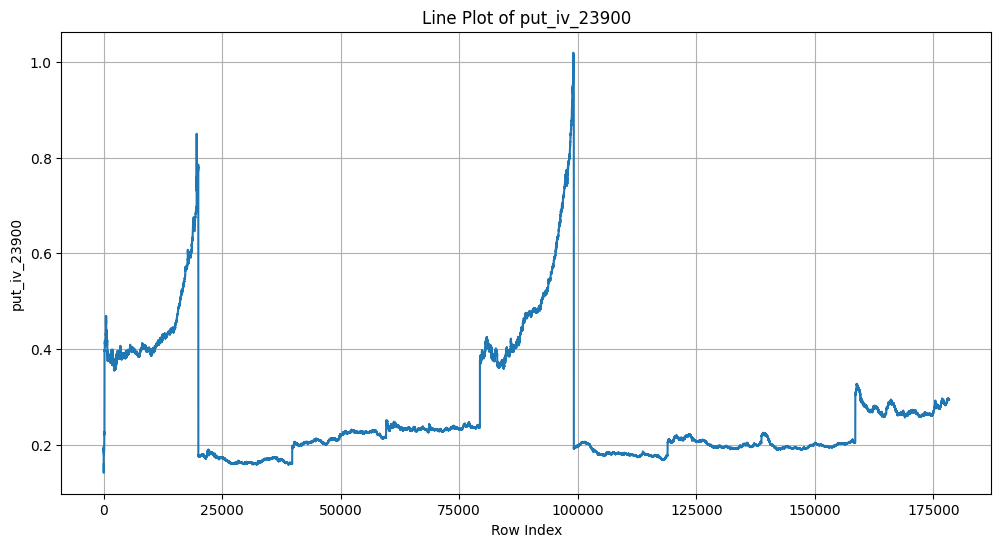

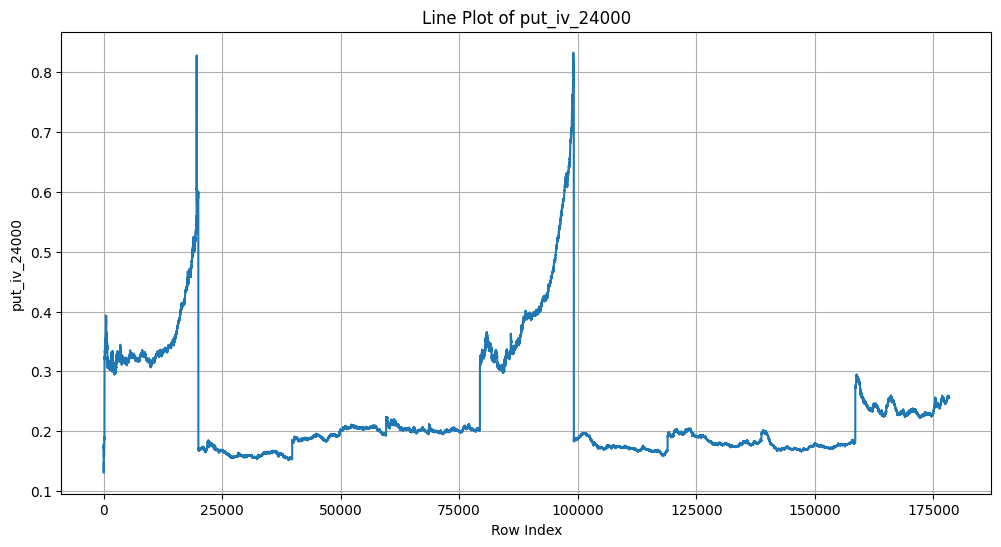

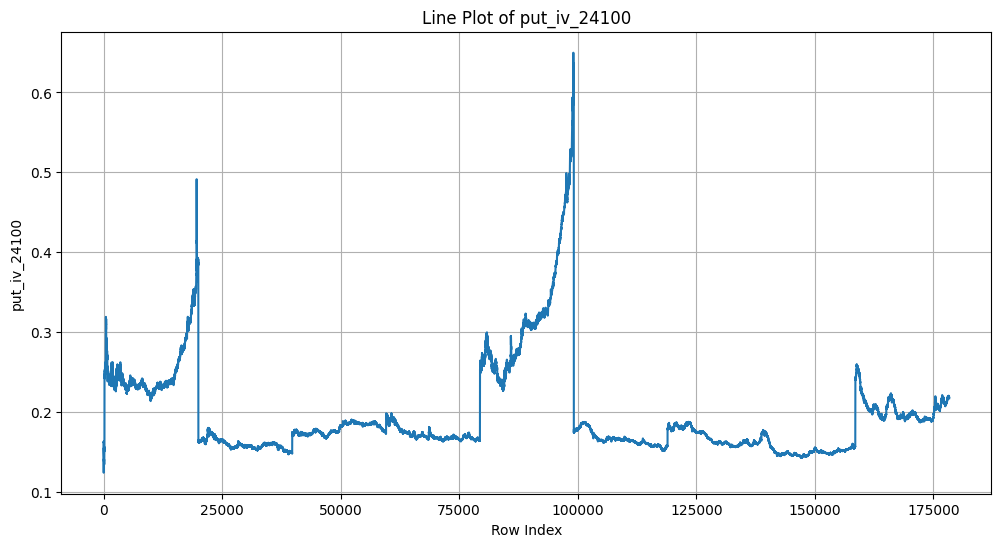

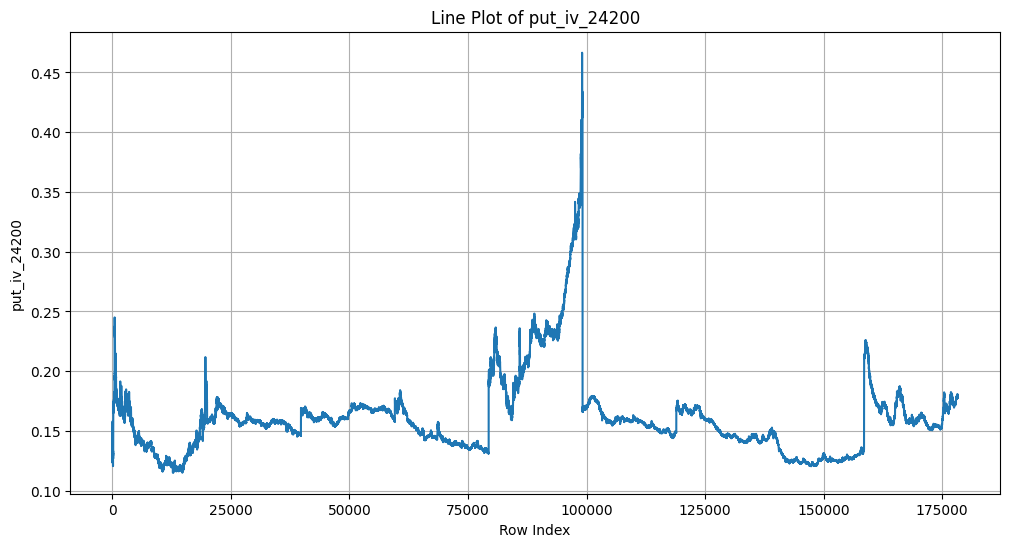

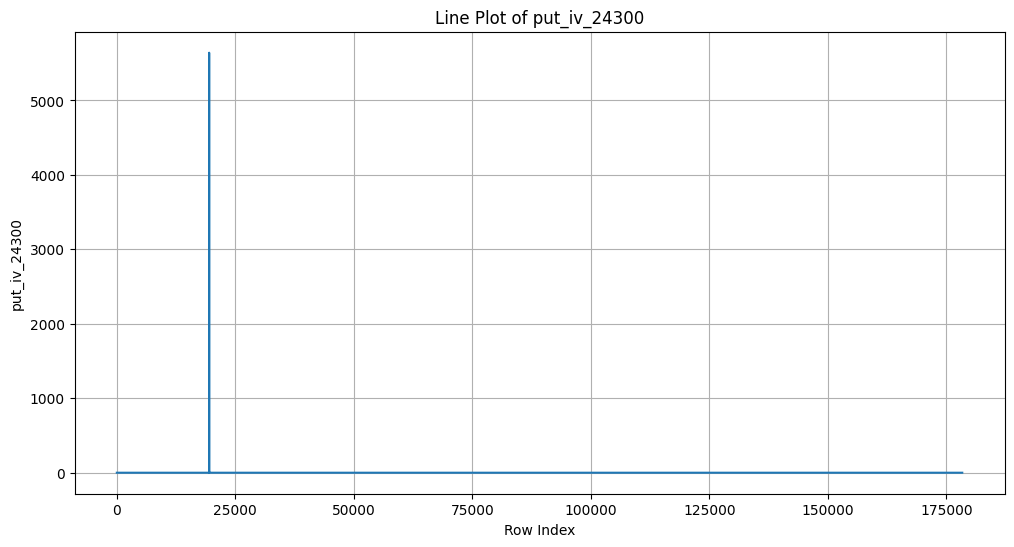

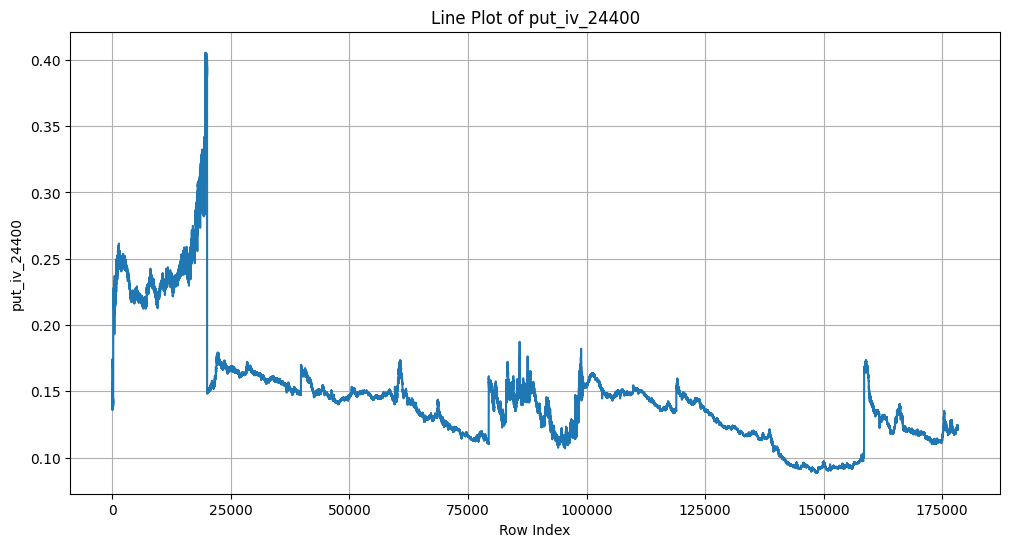

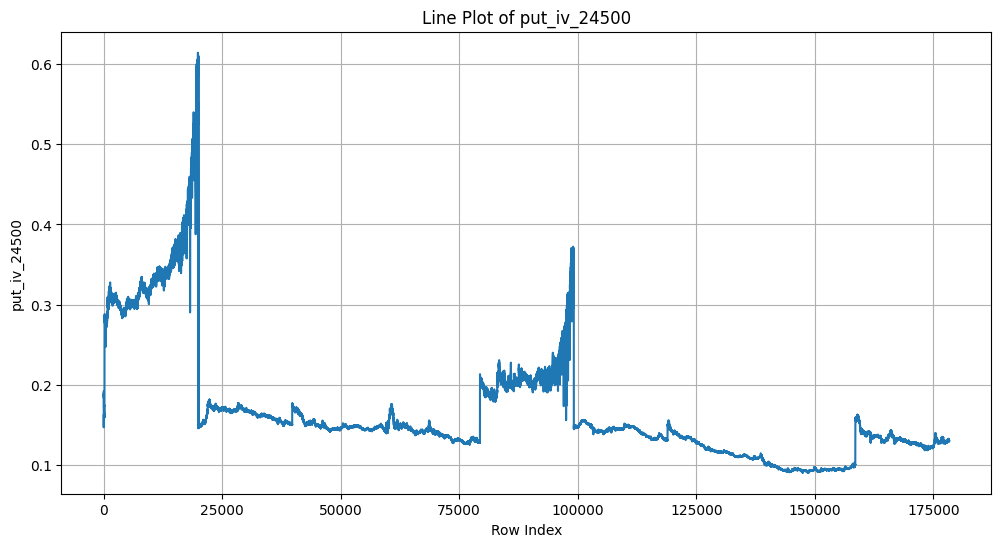

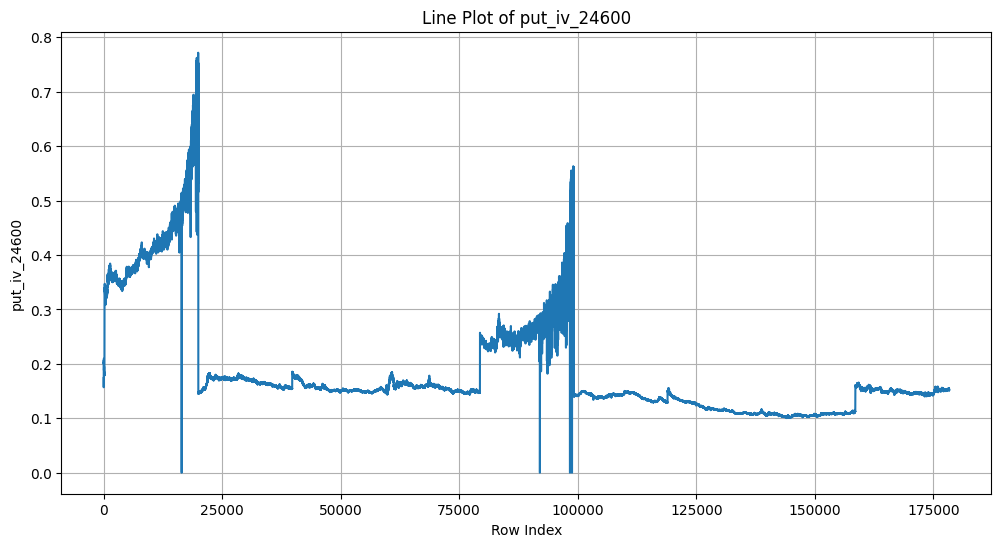

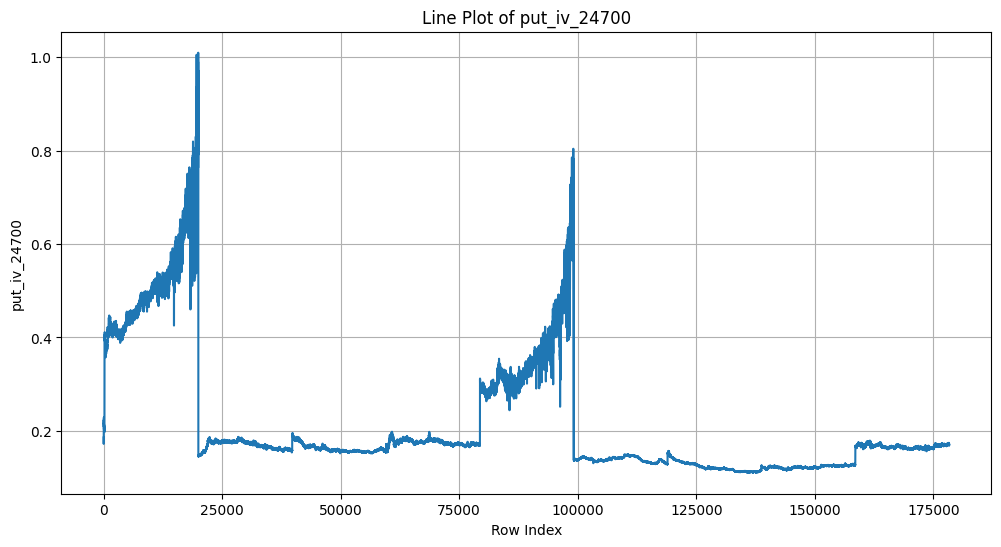

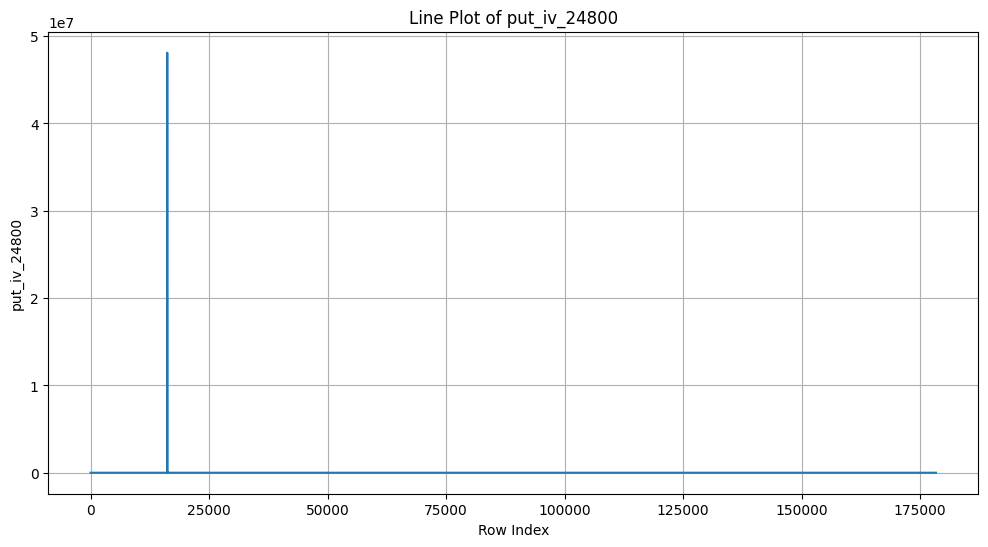

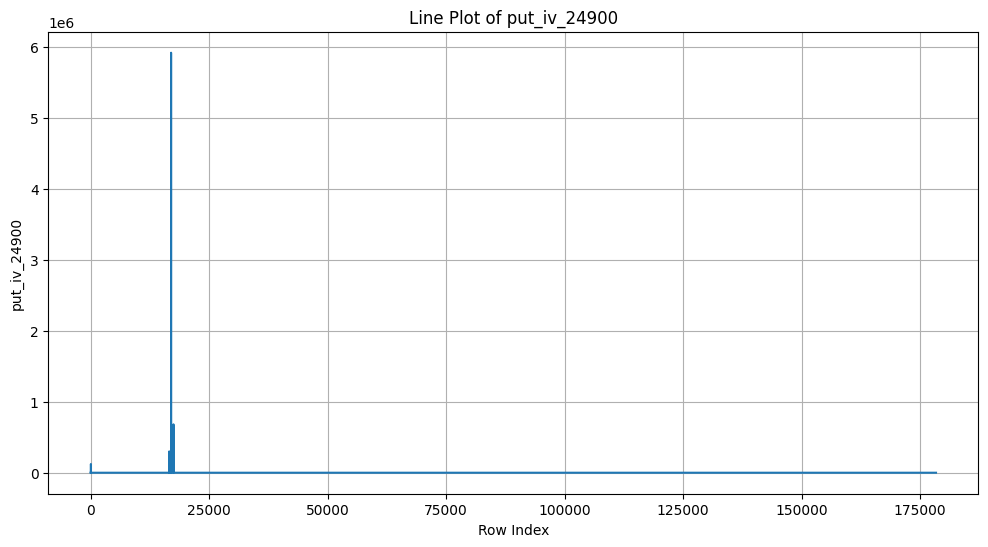

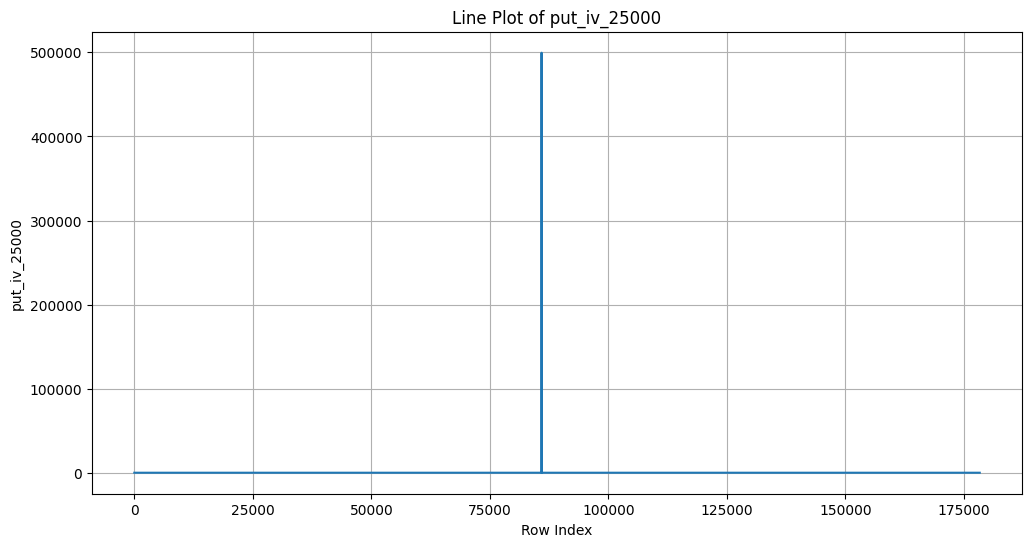

In [25]:
#plotting all the values of one column from iv_cols in line graph

import matplotlib.pyplot as plt


for col in iv_cols_train:
  plt.figure(figsize=(12, 6))
  plt.plot(train_df.index, train_df[col])
  plt.xlabel('Row Index')
  plt.ylabel(col)
  plt.title(f'Line Plot of {col}')
  plt.grid(True)
  plt.show()

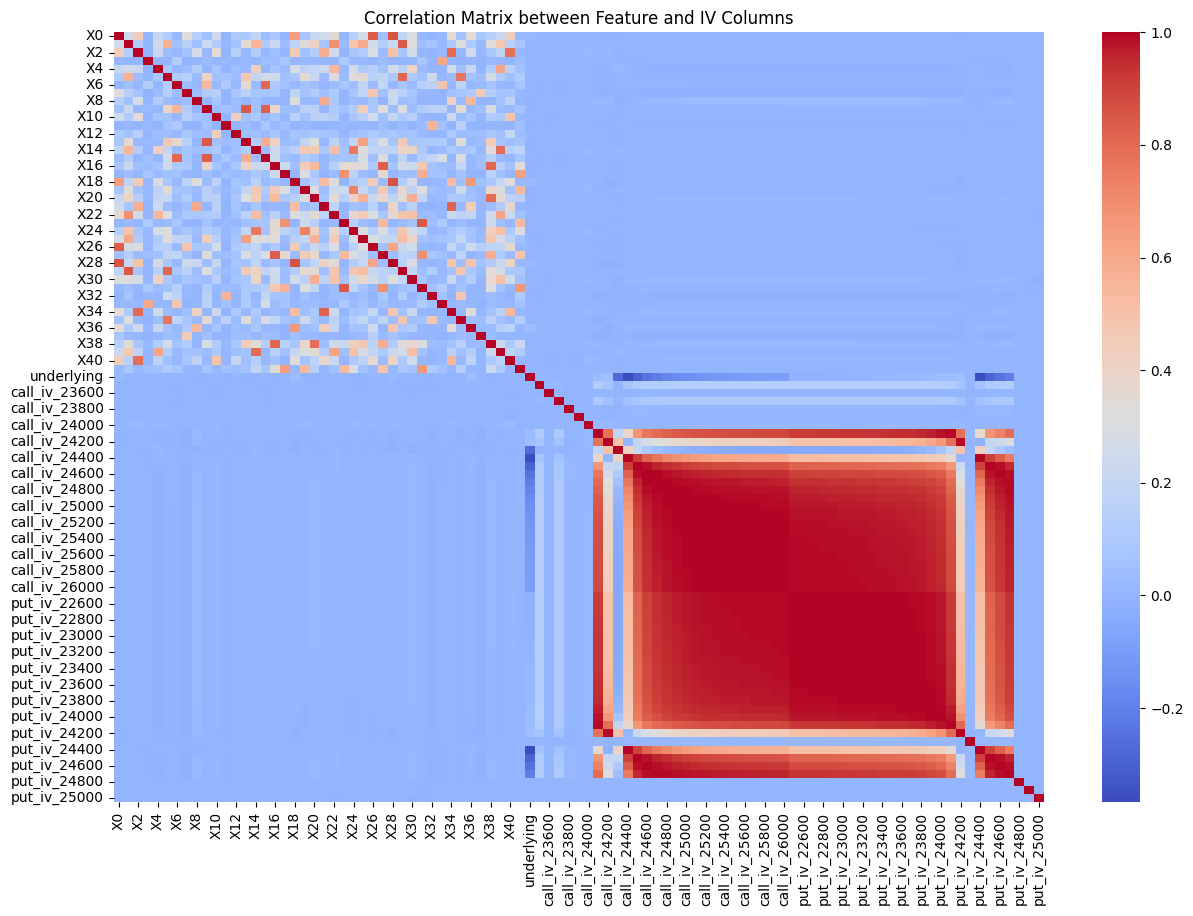

In [22]:
#correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = train_df[feature_cols_train + iv_cols_train].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix between Feature and IV Columns')
plt.show()